<a href="https://colab.research.google.com/github/Ahmed-Shatla/RBM-with-Fashion-MNIST-dataset/blob/main/RBM_with_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neural_network import BernoulliRBM
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0],-1)/255
X_test = X_test.reshape(X_test.shape[0],-1)/255

In [4]:
X_train.shape

(60000, 784)

In [5]:
X_train[0].shape

(784,)

In [6]:
model_RBM = BernoulliRBM(n_components=1024,n_iter=20,batch_size=128,verbose=1)
model_RBM.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -237.64, time = 47.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -227.96, time = 48.46s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -214.86, time = 49.18s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -214.17, time = 48.36s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -209.54, time = 48.08s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -204.29, time = 48.24s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -205.42, time = 48.12s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -201.64, time = 48.16s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -200.31, time = 48.35s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -198.55, time = 48.41s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -195.51, time = 48.27s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -200.65, time = 48.01s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -199.41, time = 48.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -199.44, time = 48.12s
[

BernoulliRBM(batch_size=128, n_components=1024, n_iter=20, verbose=1)

In [7]:
pred = model_RBM.score_samples(X_test)
pred.shape

(10000,)

In [8]:
pred.mean()

-199.426365505913

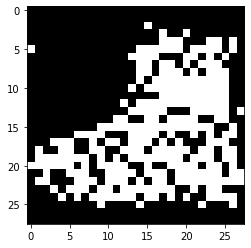

In [9]:
plt.imshow(model_RBM.gibbs(X_train[0]).reshape((28,28)),cmap='gray')


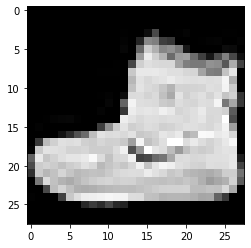

In [10]:
plt.imshow(X_train[0].reshape((28,28)),cmap='gray')

In [11]:
X_train_generated = model_RBM.gibbs(X_train)

In [12]:
y_train.shape

(60000,)

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

In [16]:
model = Sequential()

model.add(Dense(units=128,input_shape=(784,),activation='relu'))

model.add(Dense(units=512,activation='relu'))

model.add(Dense(units=128,activation='relu'))

model.add(Dense(38,activation = 'softmax'))



model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 38)                4902      
                                                                 
 dense_4 (Dense)             (None, 10)                390       
                                                                 
Total params: 237,484
Trainable params: 237,484
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [19]:
history = model.fit(X_train_generated,y_train,batch_size=32,epochs=20,verbose=1,validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4025 - accuracy: 0.8654 - val_loss: 0.6361 - val_accuracy: 0.7847
Epoch 2/20
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3766 - accuracy: 0.8737 - val_loss: 0.6688 - val_accuracy: 0.7798
Epoch 3/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3554 - accuracy: 0.8820 - val_loss: 0.6913 - val_accuracy: 0.7810
Epoch 4/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3325 - accuracy: 0.8909 - val_loss: 0.7252 - val_accuracy: 0.7787
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3138 - accuracy: 0.8980 - val_loss: 0.7370 - val_accuracy: 0.7708
Epoch 6/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2991 - accuracy: 0.9022 - val_loss: 0.7679 - val_accuracy: 0.7713
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2835 - accuracy: 0.9087 - val_loss: 0.7737 - val_accur

Text(0.5, 0, 'epochs')

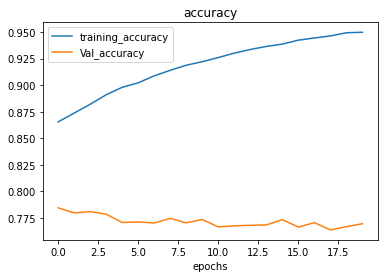

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

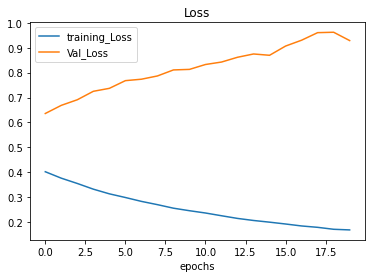

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

In [22]:
X_test.shape

(10000, 784)

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6639 - accuracy: 0.8119


[0.6638708114624023, 0.8119000196456909]